## SPRINT 05 T01 Hipotesis Testing ( Antartica pingüins data set)
from kaggle: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data

**Descripció**

- **Exercici 1**

    Descarrega el dataset i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 


- **Exercici 2**

    Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


- **Exercici 3**

    Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
from IPython.display import Image ##use the IPython Image object to display an Image
from PIL import Image

from scipy import stats


import warnings

warnings.filterwarnings('ignore')



<div class="alert alert-block alert-info">Descarrega i exploació del Data set
</div>

In [2]:
df = pd.read_csv('penguins_lter.csv')
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

- Veiem diverses columnes amb alguns nul.
- Transformo les que anirè utilitzant al llarg de la tasca que principalement seran les numèriques.
- Per tal de no eliminar dades, els hi donaré el valor mitjà

In [5]:
## Replace Nans in body waight kg for the mean
df['Body Mass (g)'].fillna(int(df['Body Mass (g)'].mean()), inplace=True)
df['Culmen Length (mm)'].fillna(int(df['Culmen Length (mm)'].mean()), inplace=True)
df['Culmen Depth (mm)'].fillna(int(df['Culmen Depth (mm)'].mean()), inplace=True)
df['Flipper Length (mm)'].fillna(int(df['Flipper Length (mm)'].mean()), inplace=True)

df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.0,17.0,200.0,4201.0,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,43.0,17.0,200.0,4201.0,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [6]:
## Comprovació
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   344 non-null    float64
 10  Culmen Depth (mm)    344 non-null    float64
 11  Flipper Length (mm)  344 non-null    float64
 12  Body Mass (g)        344 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [7]:
df.describe().round(2)

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.00,344.00,344.00,344.00,344.00,330.00,331.00
mean,63.15,43.92,17.15,200.91,4201.75,8.73,-25.69
std,40.43,5.44,1.97,14.02,799.61,0.55,0.79
min,1.00,32.10,13.10,172.00,2700.00,7.63,-27.02
25%,29.00,39.28,15.60,190.00,3550.00,8.30,-26.32
50%,58.00,44.25,17.30,197.00,4050.00,8.65,-25.83
75%,95.25,48.50,18.70,213.00,4750.00,9.17,-25.06
max,152.00,59.60,21.50,231.00,6300.00,10.03,-23.79


In [8]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

- **Faig una exploració gràfica de les dades**
    - Primer amb un pair plot per veure la seva distribució graficament i intuir correlacions.
    - Desprès per indagar més en les correlacions, obting la matriu de correlació i la plotejo en un heatmap.

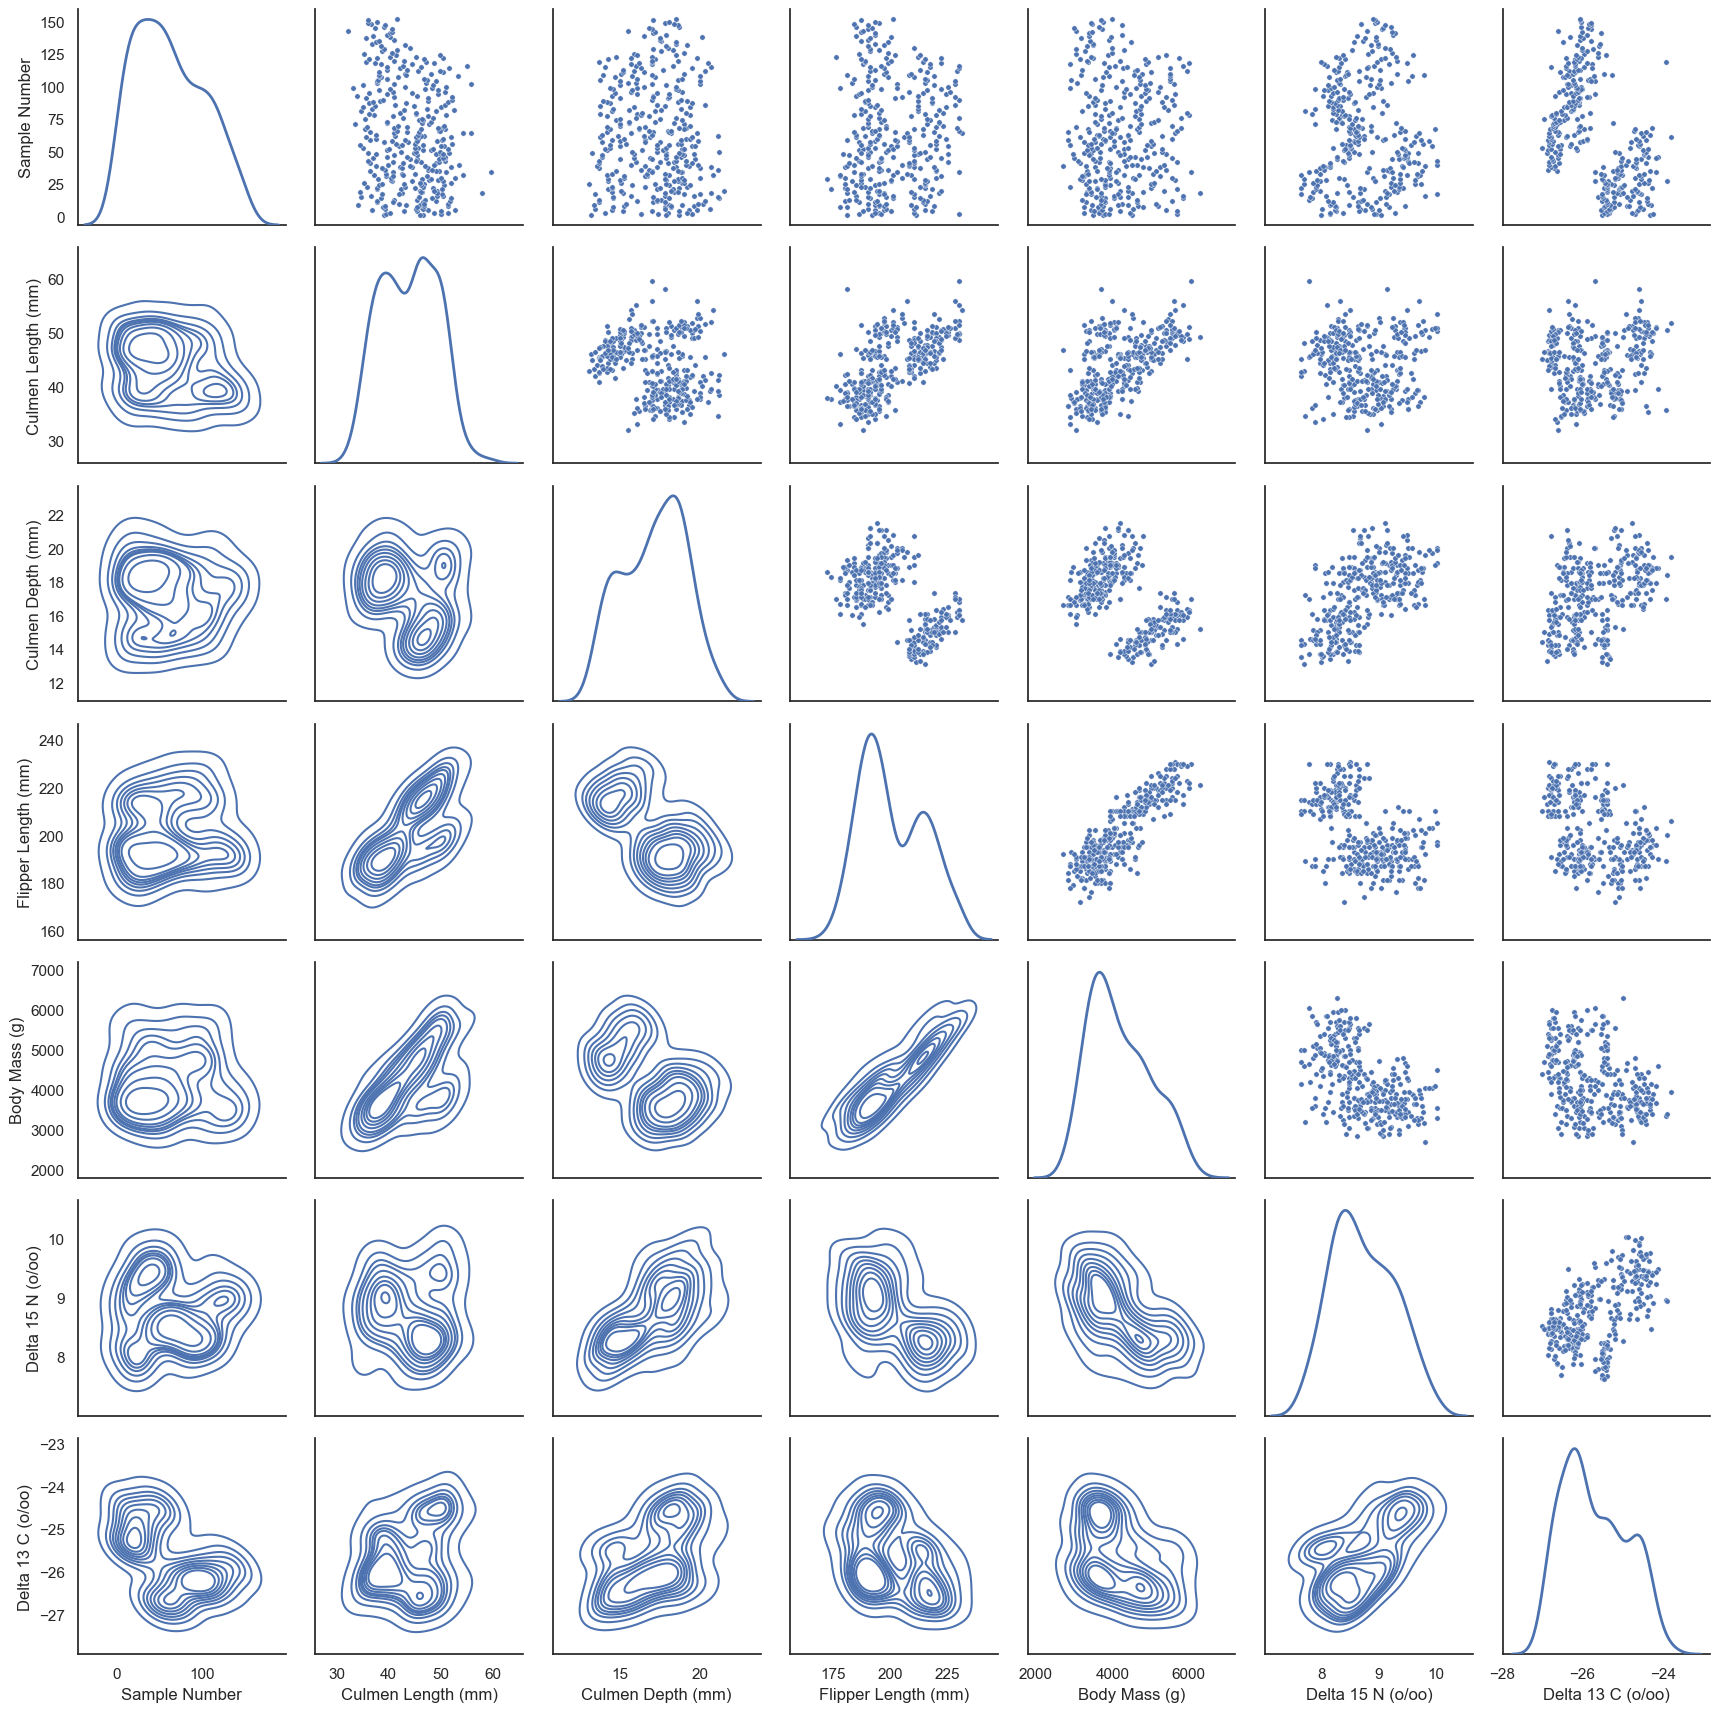

In [9]:
sns.set_theme(style="white")
#df = sns.load_dataset("penguins")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

plt.savefig('DensityCorrelationGrid_Allvariables.jpg')
plt.show()

- Veiem que la majoria de les dades podrien seguir una distribució normal, tot i que sob'serva clarament en els grafics tant de densitat com scattered una bimodalitat i dos clusters, respectivament.

In [10]:
## Matrix correlation
df.corr()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.234885,-0.022204,0.040614,-0.007000,0.006952,-0.488690
Culmen Length (mm),-0.234885,1.000000,-0.234954,0.656183,0.595061,-0.059759,0.189025
Culmen Depth (mm),-0.022204,-0.234954,1.000000,-0.583805,-0.471907,0.605874,0.429933
Flipper Length (mm),0.040614,0.656183,-0.583805,1.000000,0.871191,-0.507787,-0.376223
Body Mass (g),-0.007000,0.595061,-0.471907,0.871191,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


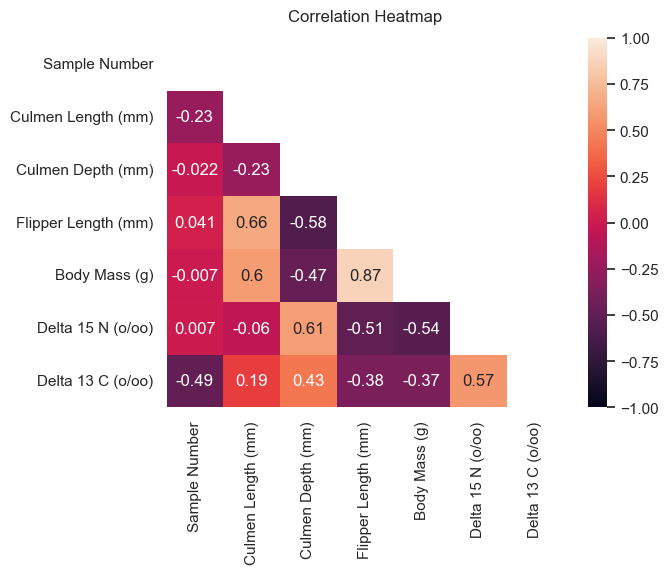

In [11]:
##Heatmap of the matrix correlation 

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
## from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True);
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


- En el heatmap observem diferents graus de correlació directes (més clars) i inversos (més foscos)
- La correlació més gran que observem és enetre el pes i la llargada de l'aleta amb un valor de 0.87

### Exercici 1

<div class="alert alert-block alert-info">Selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.  
</div>

## Workflow
from https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

1. Definir Hipòtesis
    - Quina pregunta cientifica volem respondre? i definir hipotesis nula i alternativa.
2. Assumtion test
    - Per decidir si utilitzem mètodes paramètrics o no paramètrics
        - Mirem si les observacions són independents i distribuides identicament.
        - Mirem si cada mostra està distribuida normalment
        - Mirem si cada mostra té una variança semblant
3. Escollim mètode i mirem especificacions a la pàgina del mètode i l'apliquem
    - Per seleccionar el test adequat és molt important saber quants grups volem comparar i si les dades estan emparellades o no.
4. Desició i Conclusions



### 1. Definir Hipòtesis

- Vull Mirar si la mitjana del pes dels pingüins de l'antartida és semblant a la mitjana mundial de pes del pingüins

- H0 = Les mitjanes són iguals
- H1 = Les mitjanes són diferents
- Alpha = 0.05 (5%)


- Per tal de mirar busco quines són les mitjanes mundials de pes dels pingüins. Trobo una taula amb amb les mitjanes de pes dels pingüins i trec la mitjana i la variança.

In [12]:
PinguinsWeight = pd.read_csv('PinguinsWorldWeight.csv')
PinguinsWeight

,PenguinSpecies,WeightKg,WeightSourcePenguinSpecies
0,EmperorPenguin,37.00,Animal: The Definitive Visual Guide
1,KingPenguin,14.75,Seaworld
2,RoyalPenguin,13.50,Australian Government
3,MacaroniPenguin,5.00,Animal: The Definitive Visual Guide
4,GentooPenguin,5.95,Seaworld
5,Yellow-eyedPenguin,6.00,Seaworld
6,AdeliePenguin,4.75,Animal: The Definitive Visual Guide
7,HumboldtPenguin,4.75,Animal: The Definitive Visual Guide
8,MagellanicPenguin,5.00,Seaworld
9,ChinstrapPenguin,3.75,Animal: The Definitive Visual Guide


In [13]:
PinguinsWeight.describe()

,WeightKg
count,17.000000
mean,6.923529
std,8.586656
min,1.000000
25%,2.750000
50%,4.750000
75%,5.950000
max,37.000000


In [14]:
meanWieght = PinguinsWeight.WeightKg.mean()
meanWieght

6.923529411764706

In [15]:
varianceWeight = PinguinsWeight.WeightKg.var()
varianceWeight

73.73066176470587

- Com que les dades que hem trobat estan en kilograms, creo una nova columna al df amb el pes dels pingüins en kilos

In [16]:
df['Body Mass (Kg)'] = df['Body Mass (g)']/1000

- Miro per sobre les mitjanes i variança del pes dels pingüins a l'Antartida:

In [17]:
antarticaMeanWieght = df['Body Mass (Kg)'].mean()
antarticaMeanWieght

4.201749999999998

In [18]:
antarticaVarianceWeight = df['Body Mass (Kg)'].var()
antarticaVarianceWeight

0.6393810451895041

### 2. Assumtion check

- Mirem si les observacions són independents i distribuides identicament.
    
    
- Mirem si cada mostra està distribuida normalment
    - H₀: The data is normally distributed.
    - H₁: The data is not normally distributed.
    - Assume that α=0.05. 
    - If the p-value is >0.05, it can be said that data is normally distributed
    
    
- Mirar si les mostres tenen variances semblants
   -  H₀: The variances of the samples are the same.
   -  H₁: The variances of the samples are different.
    - En el primer Exercici no serà necessari ja que nomès tenim una mostra


In [21]:
# Define a function to check normality
## For checking normality, I used Shapiro-Wilk’s W test which is generally preferred for 
## smaller samples however there are other options like Kolmogorov-Smirnov and D’Agostino and Pearson’s test. 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [24]:
## Define a function to check variance
## For checking variance homogeneity, I preferred Levene’s test  
## but you can also check Bartlett’s test
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

- Mirem graficament i amb test estadistic, si les dades del pes dels pingüins estan normalment distribuides:

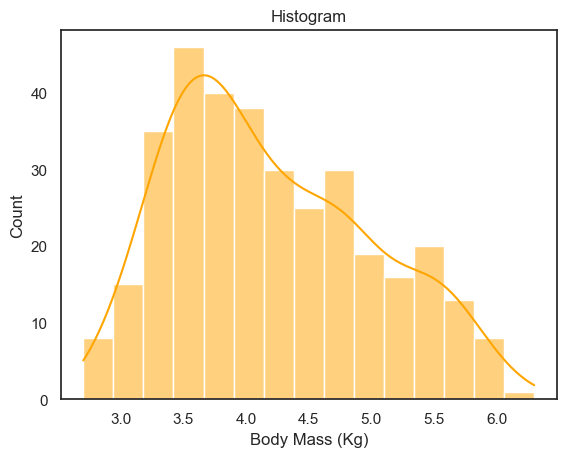

In [19]:
## Histograma amb density curve
sns.histplot(data=df, x='Body Mass (Kg)', bins=15, color='orange', kde= True)
plt.title("Histogram");

In [23]:
check_normality(df['Body Mass (Kg)'])

p value:0.000000
Reject null hypothesis >> The data is not normally distributed


- Veiem tant en el gràfic com fent el test estadistic, que **les dades no estan distribuides normalment**



#### Mann–Whitney U test

- Com que no podem aplicar un test estadistic per dades normals com t-test aplicarem el test Mann–Whitney U test un test per dades no-paramètriques.
- En aquest cas doncs, per aplicar el Mann–Whitney U test un test necessitem posar dos attributs, hi posaré els els pessos de tots els pingüins i els pesos dels pingüins de l'antartida


- In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test (WRS), or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.


- It can be applied on unknown distributions contrary to t-test which has to be applied only on normal distributions, and it is nearly as efficient as the t-test on normal distributions.


In [27]:
ttest,pvalue = stats.mannwhitneyu(df['Body Mass (Kg)'], PinguinsWeight['WeightKg'])
print("p-value:%.4f" % pvalue)
if pvalue > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


p-value:0.9943
Probably the same distribution


- p-value = 0.9943
- alpha = 0.05


- Clarament podem veure que **p-value > alpha** 0.9943 > 0.05
- Podem dir que acceptem la hipotesis nula (H0) amb un alpha de 0.05. 
- Per tant, les mitjanes de pes de les poblacions de Pingüins de l'Antartida són equivalents a les mitjanes mundials de pes dels Pinguïns amb un alpha de 0.05.

### Exercici 2

<div class="alert alert-block alert-info">Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.  
</div>

### 1. Definir Hipòtesis

- Vull mirar si les dues variables de les dimensions dels picks segueixen una mateixa distribuició normal

- H0 = segueixen distribució normal
- H1 = no segueixen distribució normal
- Alpha = 0.05 (5%)


- Mirem la distribució grafica dels atributs a testejar

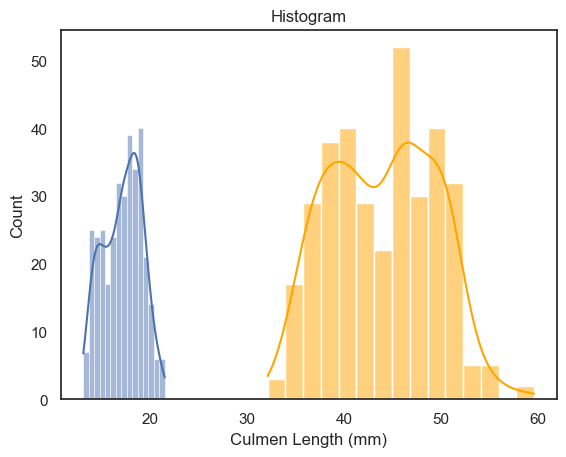

In [31]:
sns.histplot(data=df, x='Culmen Length (mm)', bins=15, color='orange', kde= True)
sns.histplot(data=df, x='Culmen Depth (mm)', bins=15, kde= True)
plt.title("Histogram");

### 2. Assumtion check

- Mirem si les observacions són independents i distribuides identicament.
    
    
- Mirem si cada mostra està distribuida normalment
    - H₀: The data is normally distributed.
    - H₁: The data is not normally distributed.
    - Assume that α=0.05. 
    - If the p-value is >0.05, it can be said that data is normally distributed
    
    
- Mirar si les mostres tenen variances semblants
   -  H₀: The variances of the samples are the same.
   -  H₁: The variances of the samples are different.
    - En el primer Exercici no serà necessari ja que nomès tenim una mostra

In [33]:
check_normality(df['Culmen Length (mm)'])
check_normality(df['Culmen Depth (mm)'])

p value:0.000015
Reject null hypothesis >> The data is not normally distributed
p value:0.000005
Reject null hypothesis >> The data is not normally distributed


In [34]:
check_variance_homogeneity(df['Culmen Length (mm)'], df['Culmen Depth (mm)'])

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


- Veiem que que les dades **no segueixen una distribució normal** i que les **variances no són semblants**.
- Per tant hem d'utilitzar un test per dades **no-paramètriques**
- Tornem a utilitzar **Mann–Whitney U Test** per testejar si les distribucions de dos atributs són iguals o no.

observations from https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf
and https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [35]:
## Mann White U test
stat, p_value = mannwhitneyu(df['Culmen Length (mm)'], df['Culmen Depth (mm)'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

 Mann–Whitney U Test: statistic=118336.0000, p-value=0.0000
Probably different distributions


- Probo els tests de Wilcoxon i de Kruskal per tal de veure si funcionessin diferent:

In [36]:

stat, p = stats.wilcoxon(df['Culmen Length (mm)'], df['Culmen Depth (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [41]:

stat, p = stats.kruskal(df['Culmen Length (mm)'], df['Culmen Depth (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=515.281, p=0.000
Probably different distributions


- Aquí veiem clarament que les distribucions de la llargada i ample del bec dels pingüins no tenen una mateixa distribució ja que p-value surt en totes 0 i <alpha
- A més a més, la matriu de correlació entre aquests valors ens ha donat -0.23, molt aprop del 0, així que no sembla que tinguin una correlació.


### Exercici 3

<div class="alert alert-block alert-info">Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.
</div>

- En aquesta ocasió vull mirar si hi ha relació entre les mitjanes de de la llargada del bec entre les diferents especies de pingüins de l'Antartida.

- Primer mirem les distribucions graficament
- Mirem si seguiexen distribucions normals
- Mirem si les variances són semblants

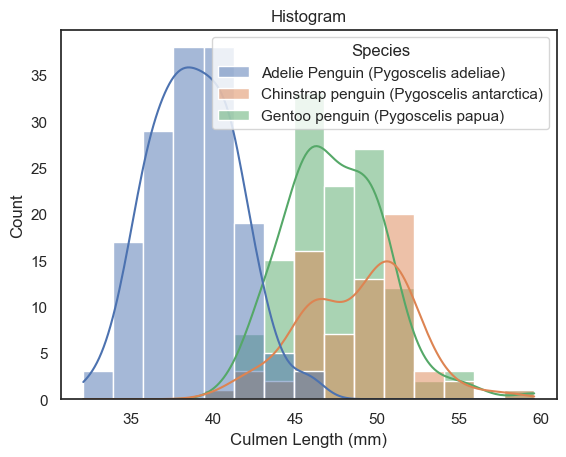

In [80]:
sns.histplot(data=df, x='Culmen Length (mm)', hue = 'Species', bins=15, kde=True)
#sns.histplot(data=df, x='Culmen Depth (mm)',  hue = 'Species', bins=15, kde=True)
plt.title("Histogram");

- Sembla que les distribucions son diferents, almenys una d'elles que sembla més bimodal. Anem a comprobar-ho matemàticament



- Creo 3 dataframes, un paer cada especie

In [47]:
culmenAdelai = df.loc[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
culmenChinstrap = df.loc[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
culmenGentoo = df.loc[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']


- Per tal d'aplicar els tests necessitem que la variable d'especies sisgui numèrica:

In [53]:
## Fem un replace de les categoriques per numeros
df['Species_Numeric'] = df['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)',
                                               'Chinstrap penguin (Pygoscelis antarctica)', 
                                               'Gentoo penguin (Pygoscelis papua)'], [1,2,3])

- Mirem la normalitat de cada variable i les variances
- Primer tornem a seleccionar cada variable perque més endavant també ens servirà

In [68]:
culmenAdelai = df.loc[df['Species_Numeric'] == 1]
culmenChinstrap = df.loc[df['Species_Numeric'] == 2]
culmenGentoo = df.loc[df['Species_Numeric'] == 3]


- Passem el test de normalitat

In [70]:
check_normality(culmenAdelai['Culmen Length (mm)'])
check_normality(culmenChinstrap['Culmen Length (mm)'])
check_normality(culmenGentoo['Culmen Length (mm)'])

p value:0.733514
Fail to reject null hypothesis >> The data is normally distributed
p value:0.194095
Fail to reject null hypothesis >> The data is normally distributed
p value:0.012693
Reject null hypothesis >> The data is not normally distributed


- Per tal de mirar si les variances dels atributs són semblants entre elles utilitzo el test Levene.

In [79]:
## Check variance of 3 atributes
stat, pvalue_levene= stats.levene(culmenAdelai['Culmen Length (mm)'], culmenChinstrap['Culmen Length (mm)'], culmenGentoo['Culmen Length (mm)'])
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.1178
Fail to reject null hypothesis >> The variances of the samples are same.


#### f Oneway

- Com que almenys una de les variables no és normal hem de buscvar un test per no paramètriques i que serveixi per 3 atributs



In [77]:
## 
stat, p = stats.f_oneway(culmenAdelai['Culmen Length (mm)'], culmenChinstrap['Culmen Length (mm)'], culmenGentoo['Culmen Length (mm)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=405.799, p=0.000
Probably different distributions


- Com a **conclusió** sembla que els tests ens diuen que les distribucións son diferents com s'ha pogut observar graficament abans.